# Introduction

The purpose of these data collections is to discover which zipcode within Pittsburgh is the best to live in the case of some doomsday level catastrophe. We had to use zipcodes  because not all of our data sets had neighborhood information, we felt that zipcodes are a liitle more concrete than neighborhoods, and most zipcodes lin up pretty cleanly to neighborhoods.

In [1]:
#Pop is giving each zip a corresponding population size
pop={
15106:19575,
15120:18757,
15201:12988,
15204:8676,
15205:22736,
15206:29369,
15207:12763,
15208:10451,
15210:27099,
15211:11141,
15212:26708,
15213:28105,
15214:14507,
15215:12566,
15216:23217,
15217:28508,
15218:13954,
15219:16239,
15220:18060,
15221:31461,
15222:4256,
15224:10945,
15226:13813,
15227:29198,
15232:11858,
15233:4469,
15234:13676,
15235:34625,
15236:29916,
15238:13520,
}


In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plot
zip_codes = [15106, 15120, 15201, 15204, 15205, 15206, 15207, 15208, 15210, 15211, 15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15224, 15226, 15227, 15232, 15233, 15234, 15235, 15236, 15238]


## Supermarkets 

This data set was chosen to identify the amount of supermarkets/convenience stores within a given zip code by sorting by occurences and dividing by population to see what a more realistic pool of resources one store represents in a given zip. The data only stratified by what was considered to be a convenient store and supermarket. While supermarket was a bit more consistent a convenient store could range anywhere from a gas station like Sunoco to a store like Walgreens. For the sake of simplicity both will be weighed the same as supermarkets provide much more food, but often less versatility in terms of having gas, or a pharmacy. 


       Number of Stores  Stores per 10000
15204                 3          3.457815
15214                 3          2.067967
15233                 3          6.712911
15232                 4          3.373250
15207                 4          3.134059
15211                 5          4.487927
15234                 6          4.387248
15208                 6          5.741077
15215                 6          4.774789
15216                 7          3.015032
15201                 7          5.389590
15226                 8          5.791646
15220                 8          4.429679
15218                 8          5.733123
15106                 9          4.597701
15238                 9          6.656805
15120                10          5.331343
15217                11          3.858566
15224                11         10.050251
15227                15          5.137338
15205                15          6.597467
15221                16          5.085662
15235                16          4

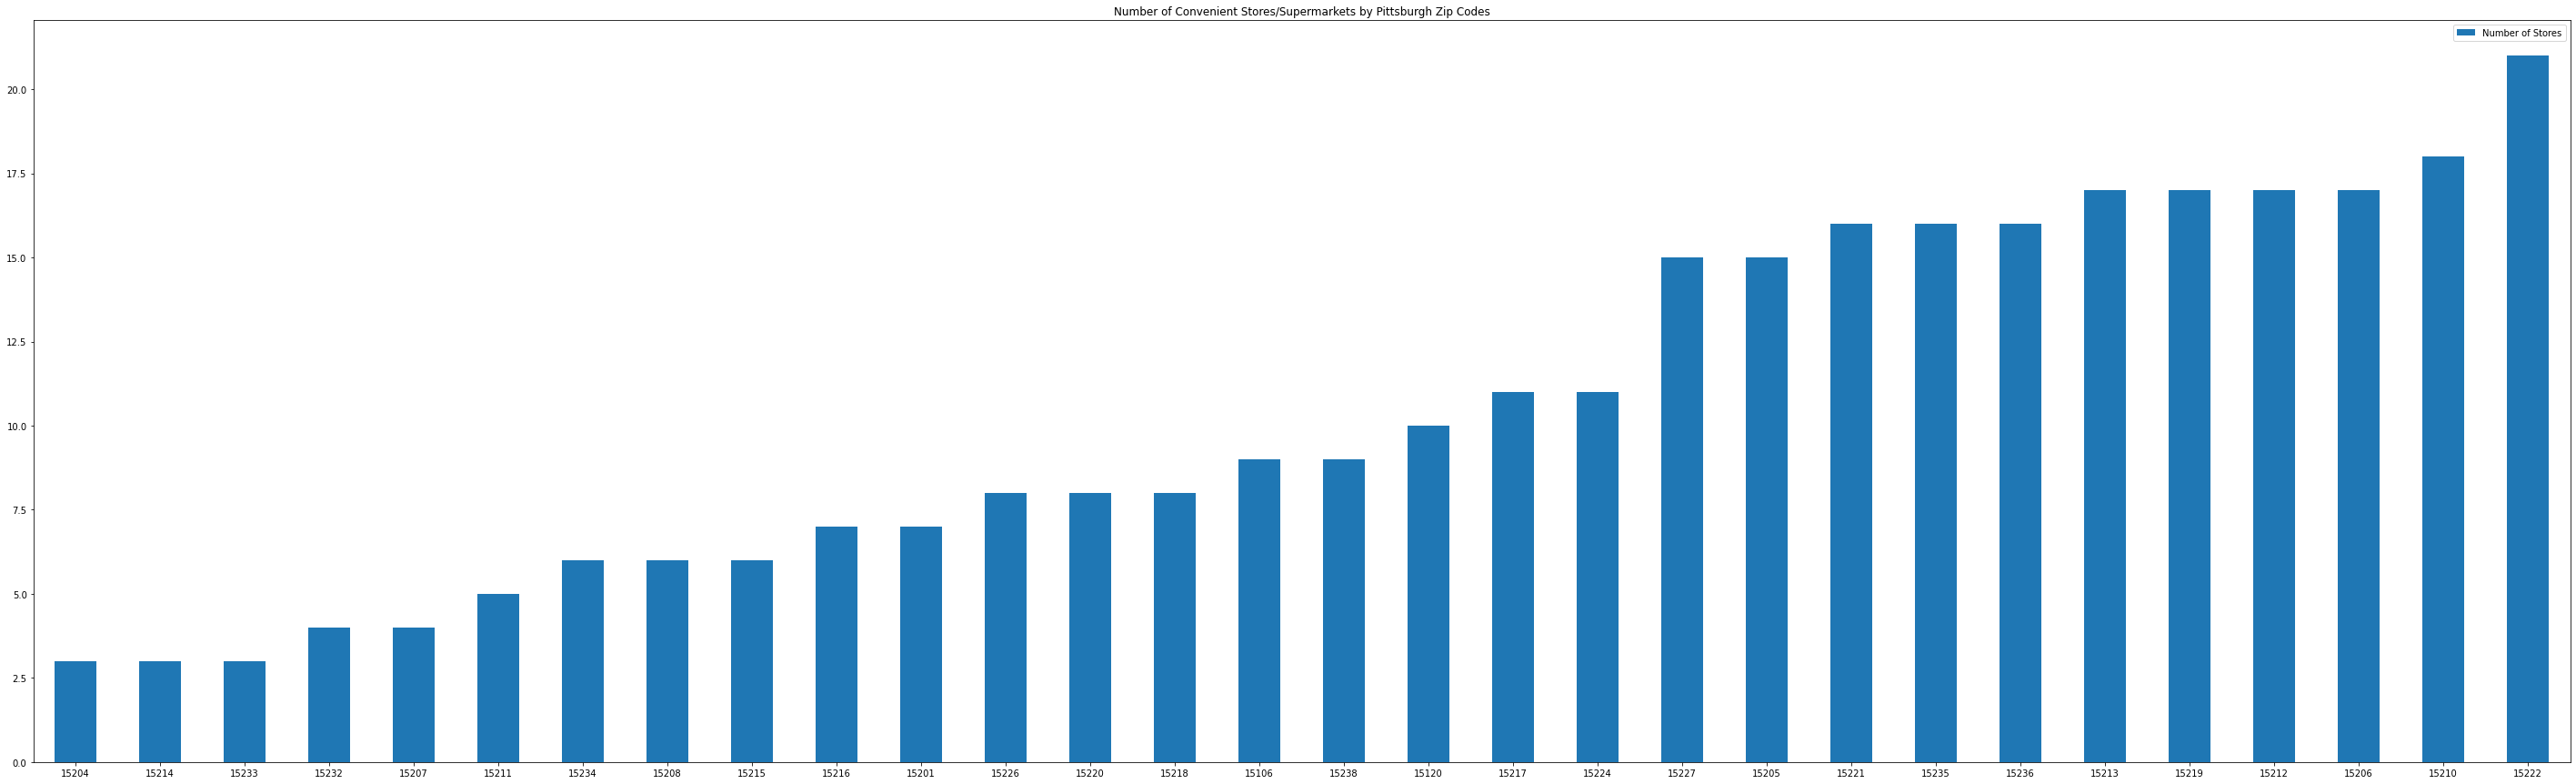

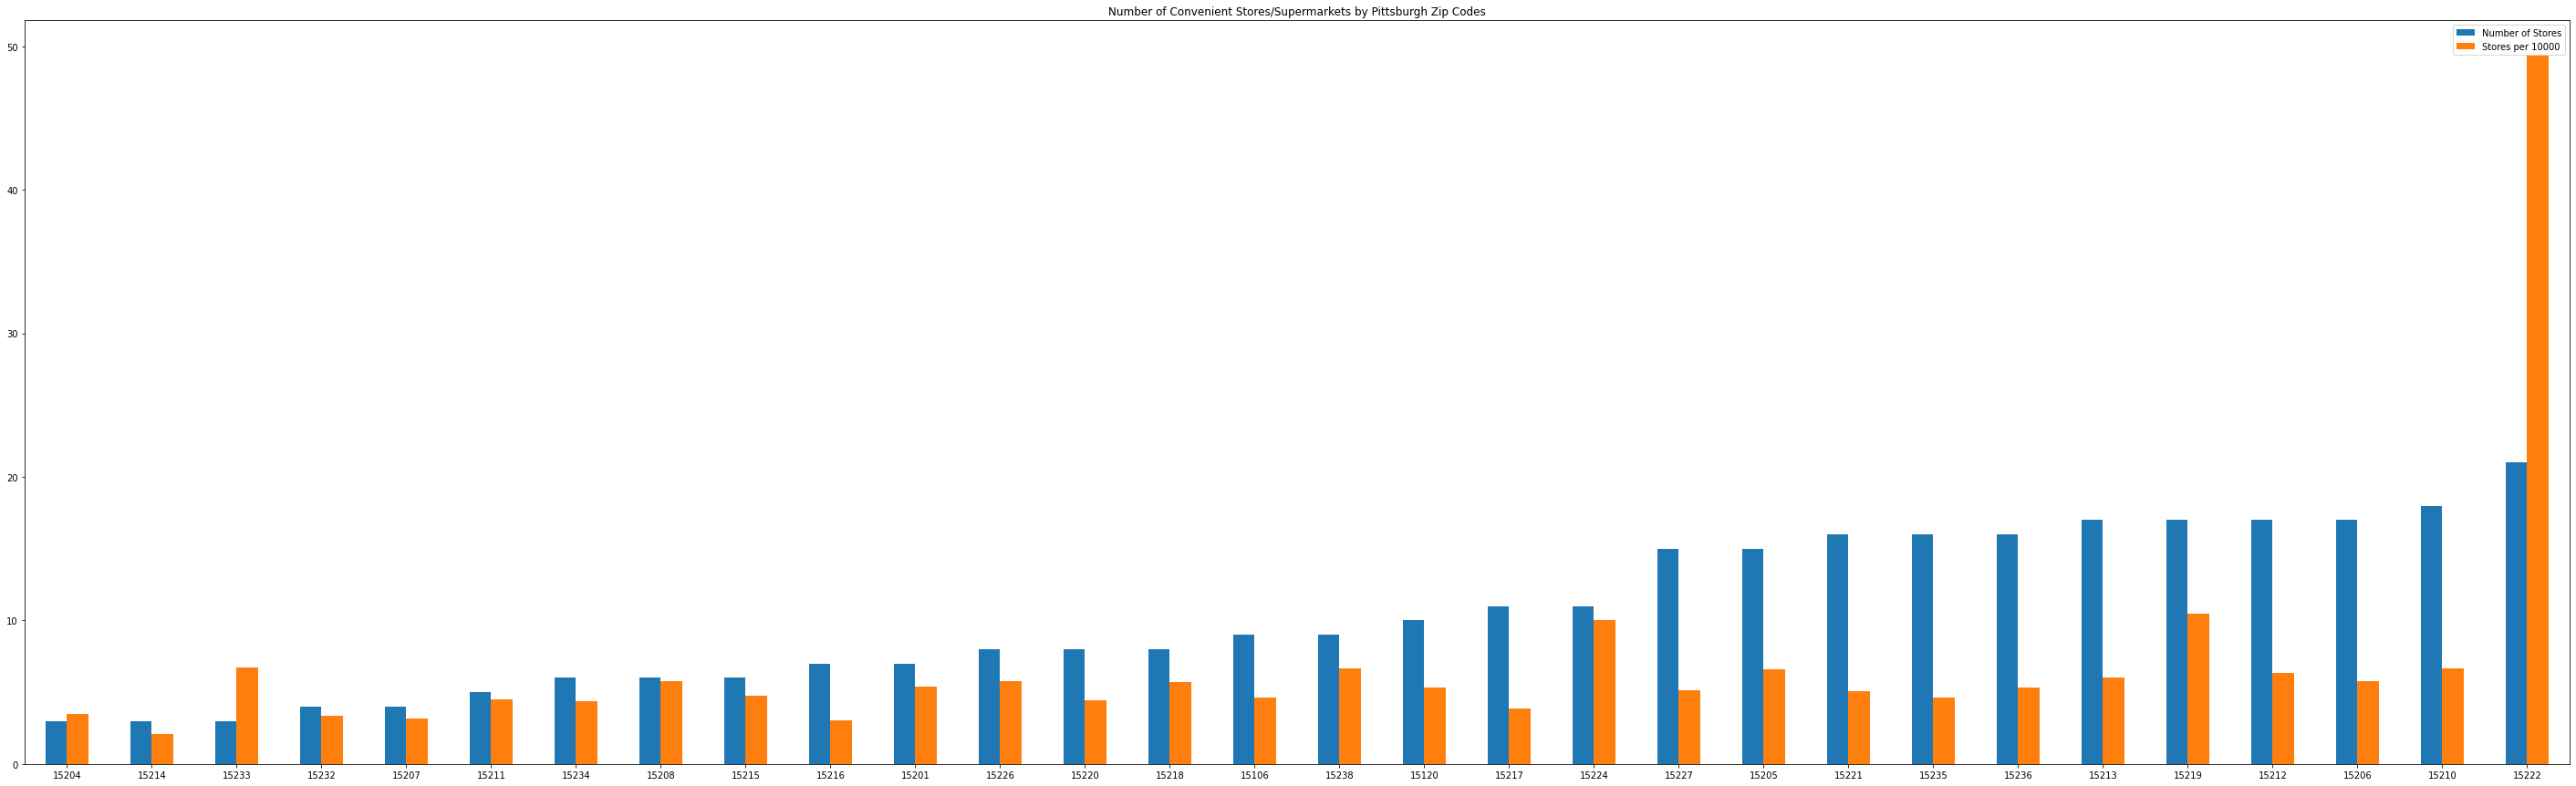

In [3]:
##Ben's stuff
chip = pd.read_csv("data-conveniencesupermarkets.csv")
df=pd.DataFrame()
chip=chip.dropna(subset=["Zip"])
chip["Zip"]=pd.to_numeric(chip["Zip"],downcast="integer")
chip_filtered = chip[chip["Zip"].isin(zip_codes)]
df['Number of Stores']=chip_filtered['Zip'].value_counts()
df=df.sort_values(by='Number of Stores')
df.plot.bar(y='Number of Stores',figsize=(50,15),rot=0, title='Number of Convenient Stores/Supermarkets by Pittsburgh Zip Codes')
popS=[]
for ind in df.index:
    storeT=df['Number of Stores'][ind]
    popT=pop[ind]
    popS.append(storeT/popT*10000)
df["Stores per 10000"]=popS
print(df)
##df.plot.bar(y='',figsize=(50,15),rot=0, title='Number of Convenient Stores/Supermarkets by Pittsburgh Zip Codes per person')
df.plot.bar(figsize=(50,15),rot=0, title='Number of Convenient Stores/Supermarkets by Pittsburgh Zip Codes')

## Conlclusion

15222 is the winner before and after taking population into consideration.

## Health Care Facilities

Health care centers are labeled as generic centers and the data set did not take into consideration the specialty of each facility other than it's medical aptitude. However in a doomsday scenario it should be noted that any and all medical resources should be taken into consideration. The more centers per person the better the chance at recieving medical attention, having open hospital beds, and having available equipment that can be redistributed to outfit surrounding hospitals to meet the demand of any particular doomsday cause.

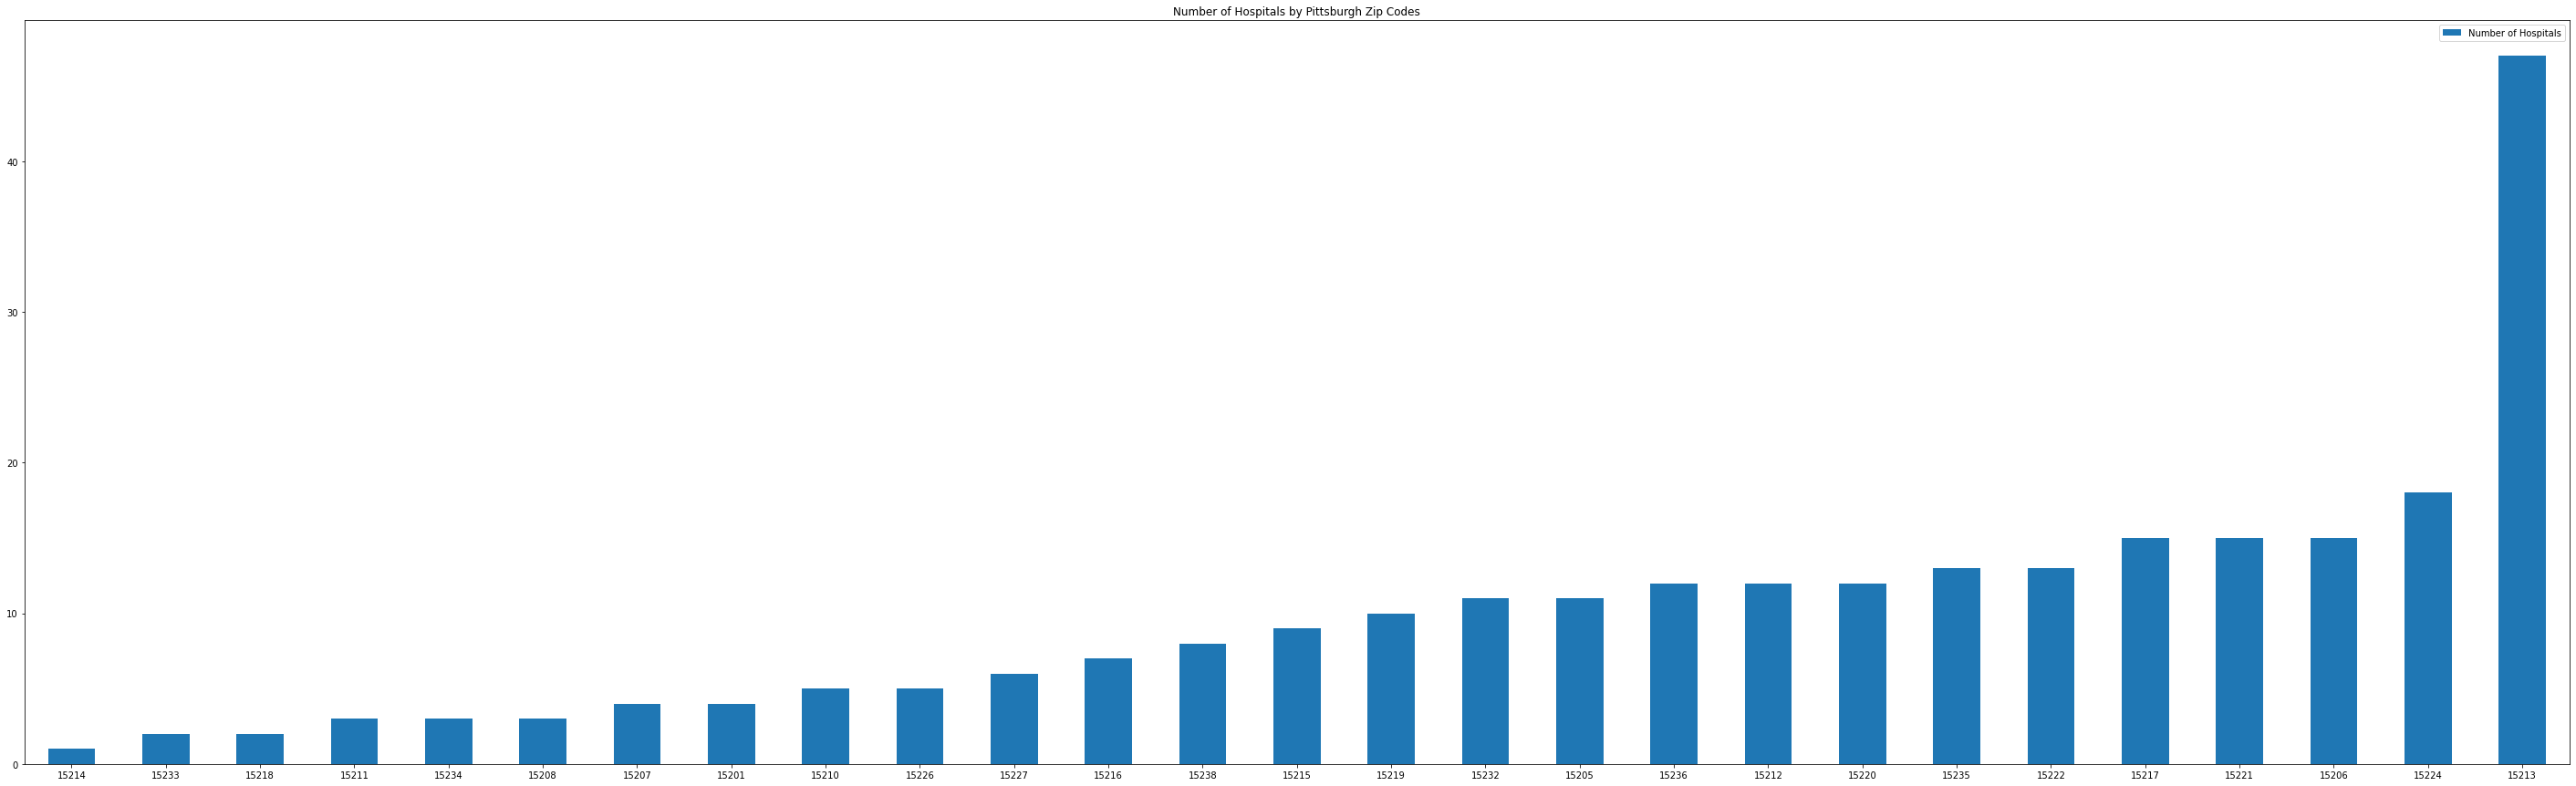

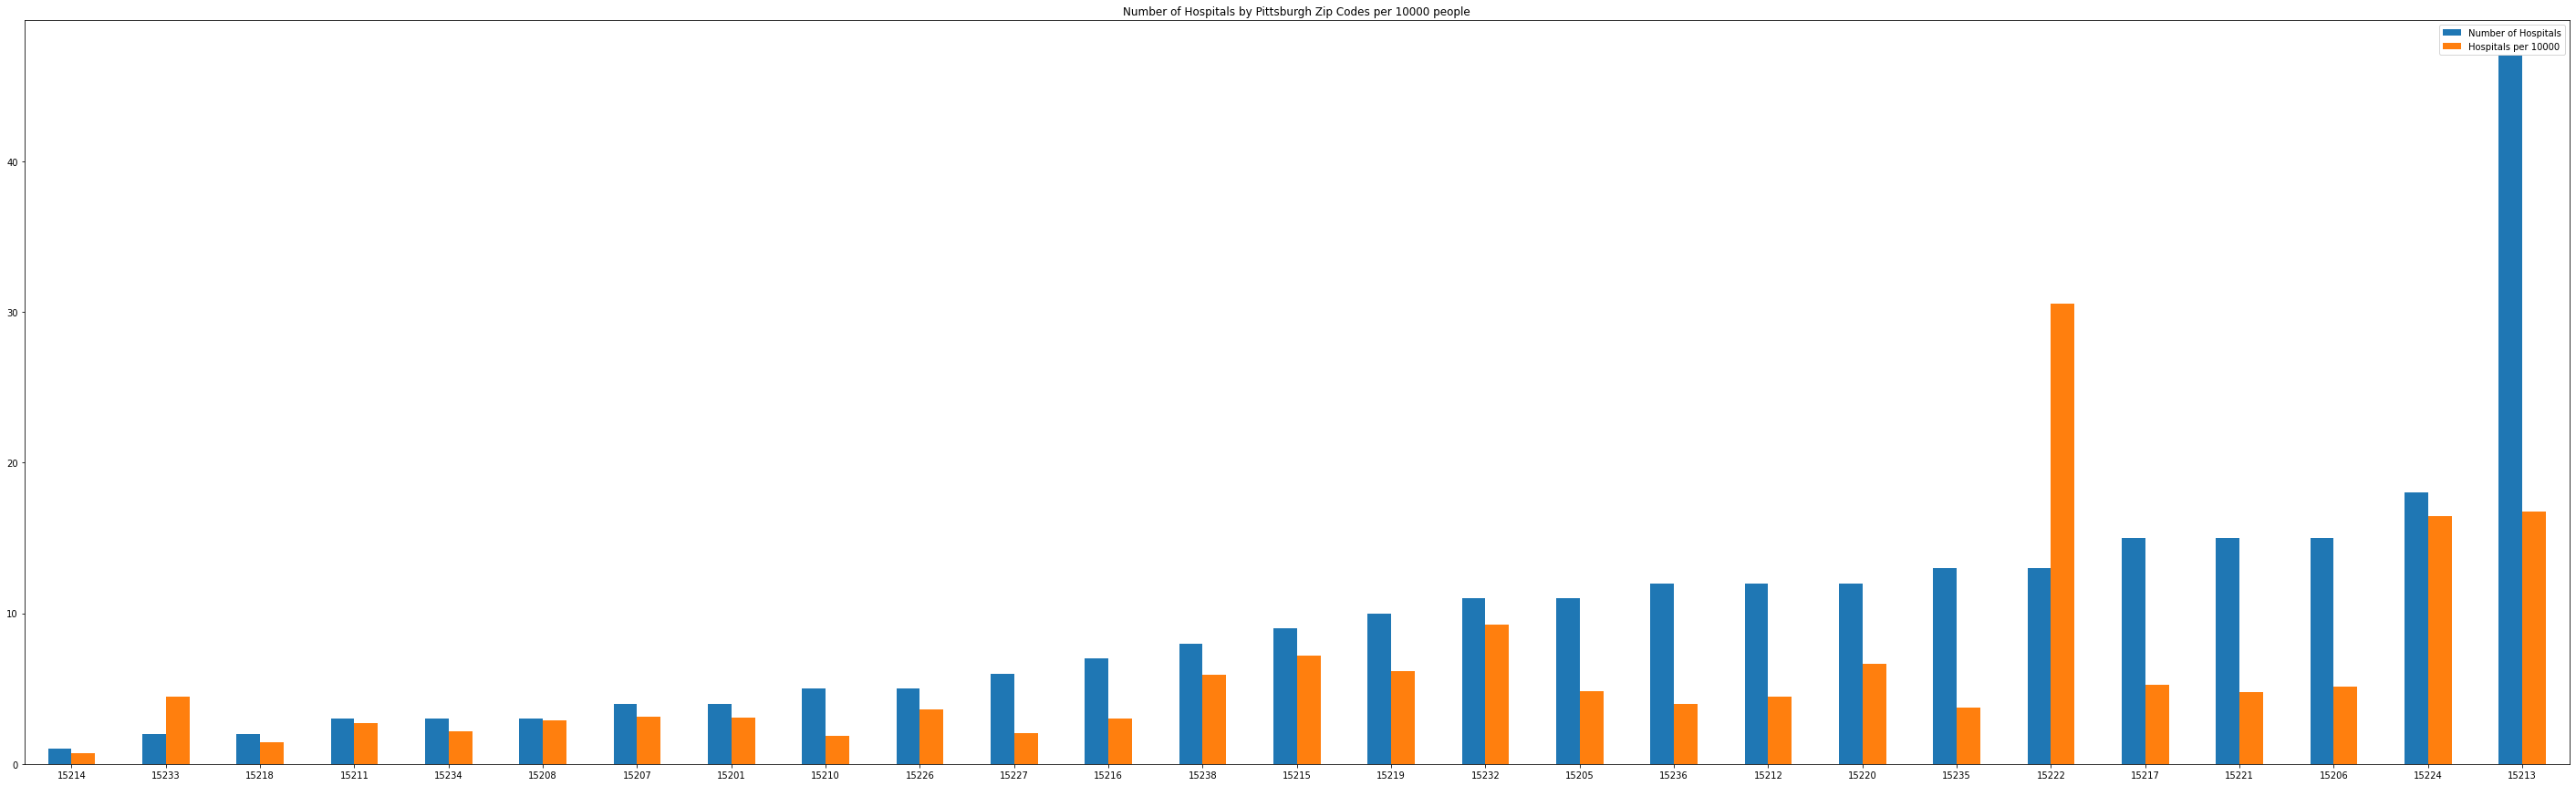

In [4]:
health_care_facilities = pd.read_csv("https://data.wprdc.org/dataset/52f87f59-02ed-4f74-9ab9-2c6b9542234d/resource/a11c31cf-a116-4076-8475-c4f185358c2d/download/data-primary-care-access-facilities.csv%22")
pgh_health_care = health_care_facilities[health_care_facilities["PRACTICE_CITY"] == "Pittsburgh"]
# filter out zipcodes not in the zip code file
zip_codes = [15106, 15120, 15201, 15203, 15204, 15205, 15206, 15207, 15208, 15210, 15211, 15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220, 15221, 15222, 15224, 15226, 15227, 15232, 15233, 15234, 15235, 15236, 15238, 15260, 15290]
pgh_health_care_filtered = pgh_health_care[pgh_health_care["PRACTICE_ZIP"].isin(zip_codes)]
df['Number of Hospitals']=pgh_health_care_filtered["PRACTICE_ZIP"].value_counts()
df=df.sort_values(by='Number of Hospitals')
dfTH=df.dropna()
dfTH.plot.bar(y='Number of Hospitals',figsize=(50,15),rot=0, title='Number of Hospitals by Pittsburgh Zip Codes')
popS=[]
for ind in df.index:
    storeT=df['Number of Hospitals'][ind]
    popT=pop[ind]
    popS.append(storeT/popT*10000)
df["Hospitals per 10000"]=popS
dfTH=df.drop(columns=['Number of Stores',"Stores per 10000"])
dfTH=dfTH.dropna()
dfTH.plot.bar(figsize=(50,15),rot=0, title='Number of Hospitals by Pittsburgh Zip Codes per 10000 people')

## Conlclusion

While zip 15213 blew everything out of the water in terms of health centers per zip after taking population into consideration 15222 is the clear winner.

## Food Gardens

Taking a different approach to food resources using a data set that gives the location of local gardens within Pittsburgh this anaysis applies the count to each each zip and adds another additional score on top of count that takes into consideration usablility and scale of the garden. In a zombie invasion having sustainable access to fruits and vegetables can be the deciding factor and increases chance of survival, and is as much better way to measure the num,er of people knowledgable about growing food at some scale, as actual number of gardens. The data is self reported by the members of the Grow Pittsburgh orginaztion.

       Number of Stores  Stores per 10000  Number of Hospitals  \
15218                 8          5.733123                  2.0   
15204                 3          3.457815                  NaN   
15214                 3          2.067967                  1.0   
15238                 9          6.656805                  8.0   
15217                11          3.858566                 15.0   
15210                18          6.642312                  5.0   
15212                17          6.365134                 12.0   
15220                 8          4.429679                 12.0   
15207                 4          3.134059                  4.0   
15201                 7          5.389590                  4.0   
15221                16          5.085662                 15.0   
15224                11         10.050251                 18.0   
15219                17         10.468625                 10.0   
15213                17          6.048746                 47.0   
15208     

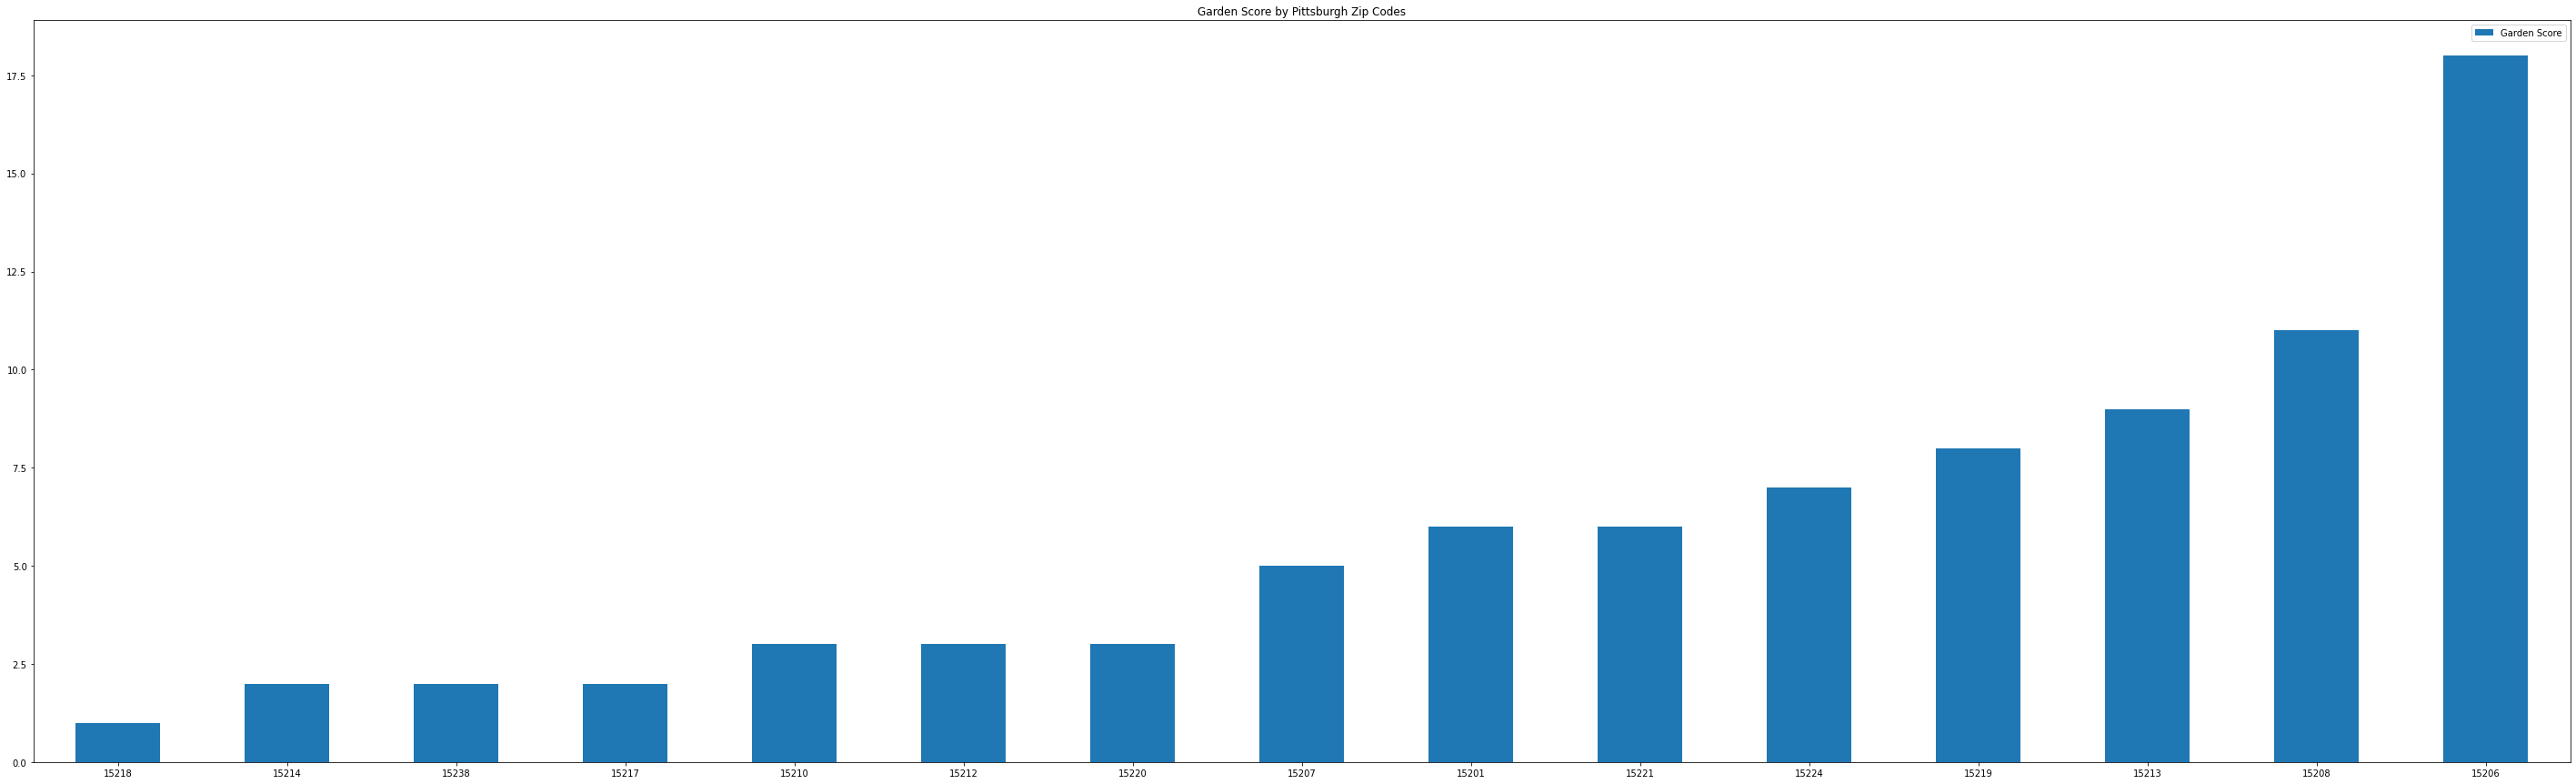

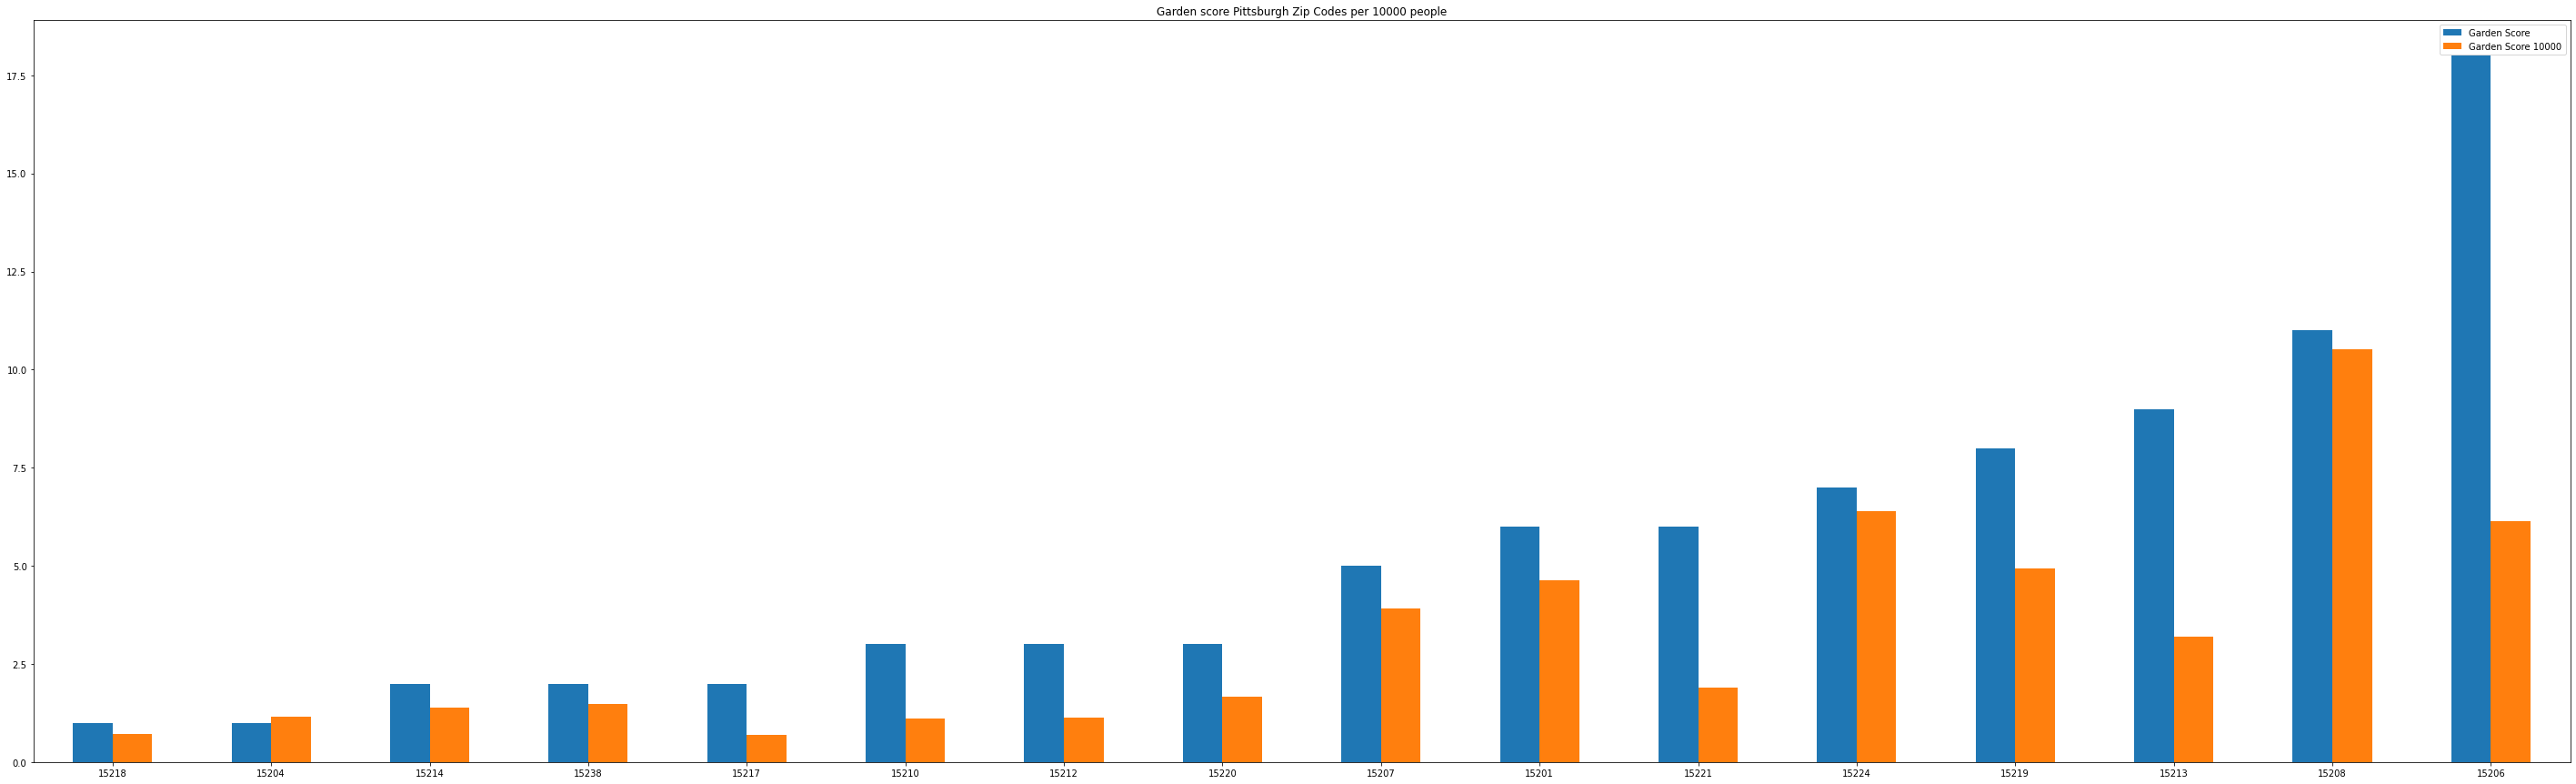

In [5]:
##Toby's stuff for food garden dataset
url="https://data.wprdc.org/dataset/0d8c9708-3f01-48c4-adff-04d29825c9a2/resource/dbdfcb3e-8fa5-4468-9b05-f69562798f7a/download/growpghgardens201712.csv"
foodGardens=pd.read_csv(url,
                        index_col="grower_id")
#removing columns we don't need
foodGardens=foodGardens.drop(columns=["url", "latitude","longitude","state","country"])
foodGardens=foodGardens.loc[foodGardens["city"]=="Pittsburgh"]
foodGardens=foodGardens.dropna(subset=["zip_code"])
foodGardens = foodGardens[foodGardens["zip_code"].isin(zip_codes)]
scores={'sustainability-fund-site|other':1,
       'other' :0,
       'grow-pittsburgh-site':0,
       'community-farm' :1,
       'community-farm|school-garden' :1,
       'school-garden':0,
       'commercial-urban-farm|grow-pittsburgh-site':3,
       'commercial-urban-farm':3,
       'allegheny-grows-site' :0,
       'sustainability-fund-site' :1,
       'community-garden':0,
       'sustainability-fund-site|school-garden':1}
# Create a dictionary to store the counts
center_counter = {}
# loop over the data
scoresA = []
for value in foodGardens["category"]:
    scoresA.append(scores[value]+1)       
foodGardens["scores"] = scoresA   
foodGardens.head(10)
for i in range(len(foodGardens)) :
    z=int(foodGardens.iloc[i, 4])
    s=foodGardens.iloc[i, 5]
    #print(row[2])
    # check to see if the center is already in the dictionary
    if z not in center_counter:
        # create a new entry
        center_counter[z] = s
    else:
        center_counter[z] = center_counter[z] + s
df["Garden Score"]=pd.DataFrame.from_dict(center_counter,orient='index',columns=["Garden score"])
df=df.sort_values(by='Garden Score')
dfTH=df.dropna()
dfTH.plot.bar(y='Garden Score',figsize=(50,15),rot=0, title='Garden Score by Pittsburgh Zip Codes')
popS=[]
for ind in df.index:
    storeT=df['Garden Score'][ind]
    popT=pop[ind]
    popS.append(storeT/popT*10000)
df["Garden Score 10000"]=popS
print(df)
dfTH=df.drop(columns=['Number of Stores',"Stores per 10000",'Number of Hospitals','Hospitals per 10000'])
dfTH=dfTH.dropna()
dfTH.plot.bar(figsize=(50,15),rot=0, title='Garden score Pittsburgh Zip Codes per 10000 people')

## Conclusion

While 15206 has the best score it is clearly a result of population, more than density. This would explain why it had so many school gardens which are only worth one. 15206 best corresponds to the east liberty neighborhood. The best per capitia is by a long shot is 15208 which best corresponds to the homewood and point breeze. It should also be noted that 15222 (strip district) is nowhere to be seen and has been the highest scoring in the previous two metrics.

In [6]:
df=df.fillna(0)

### Balancing the Metrics

In order to give a more fair representation of each metric and not allow any one metric to completely carry one zipcode way into the lead each metric was adjusted to make the winner more rounded in all three rather than just one. In order to do this we added caps to metric, and divieded their score/number by an integer so a convienve score does not carry the same weight as a hospital. The gardens also has a minimum value were anything less gets pushed to one becuase it might fix some problems but would probably cause just as many.
Stores-- Divided by 3, Cap of 5
Hospitals-- Divided by 2, Cap of 7
Farms- 5 or less push to 1, Divided by 2, Cap of 7

In [7]:
scoresF = []
for ind in df.index:
    sScore=int(df["Stores per 10000"][ind]/3)
    if(sScore>5):
        sScore=5
    scoresF.append(sScore)
df["Stores final score"]=scoresF
scoresF = []
for ind in df.index:
    hScore=int(df["Hospitals per 10000"][ind]/2)
    if(hScore>7):
        hScore=7
    scoresF.append(hScore)
df["Hospitals final score"]=scoresF
scoresF = []
for ind in df.index:
    gScore=int(df["Garden Score 10000"][ind])
    if(gScore<5 and gScore!=0):
        gScore=1
    if(gScore>5):
        gScore=int(gScore/2)
    if(gScore>7):
        gScore=7
    scoresF.append(gScore)
df["Gardens final score"]=scoresF
print(df)

       Number of Stores  Stores per 10000  Number of Hospitals  \
15218                 8          5.733123                  2.0   
15204                 3          3.457815                  0.0   
15214                 3          2.067967                  1.0   
15238                 9          6.656805                  8.0   
15217                11          3.858566                 15.0   
15210                18          6.642312                  5.0   
15212                17          6.365134                 12.0   
15220                 8          4.429679                 12.0   
15207                 4          3.134059                  4.0   
15201                 7          5.389590                  4.0   
15221                16          5.085662                 15.0   
15224                11         10.050251                 18.0   
15219                17         10.468625                 10.0   
15213                17          6.048746                 47.0   
15208     

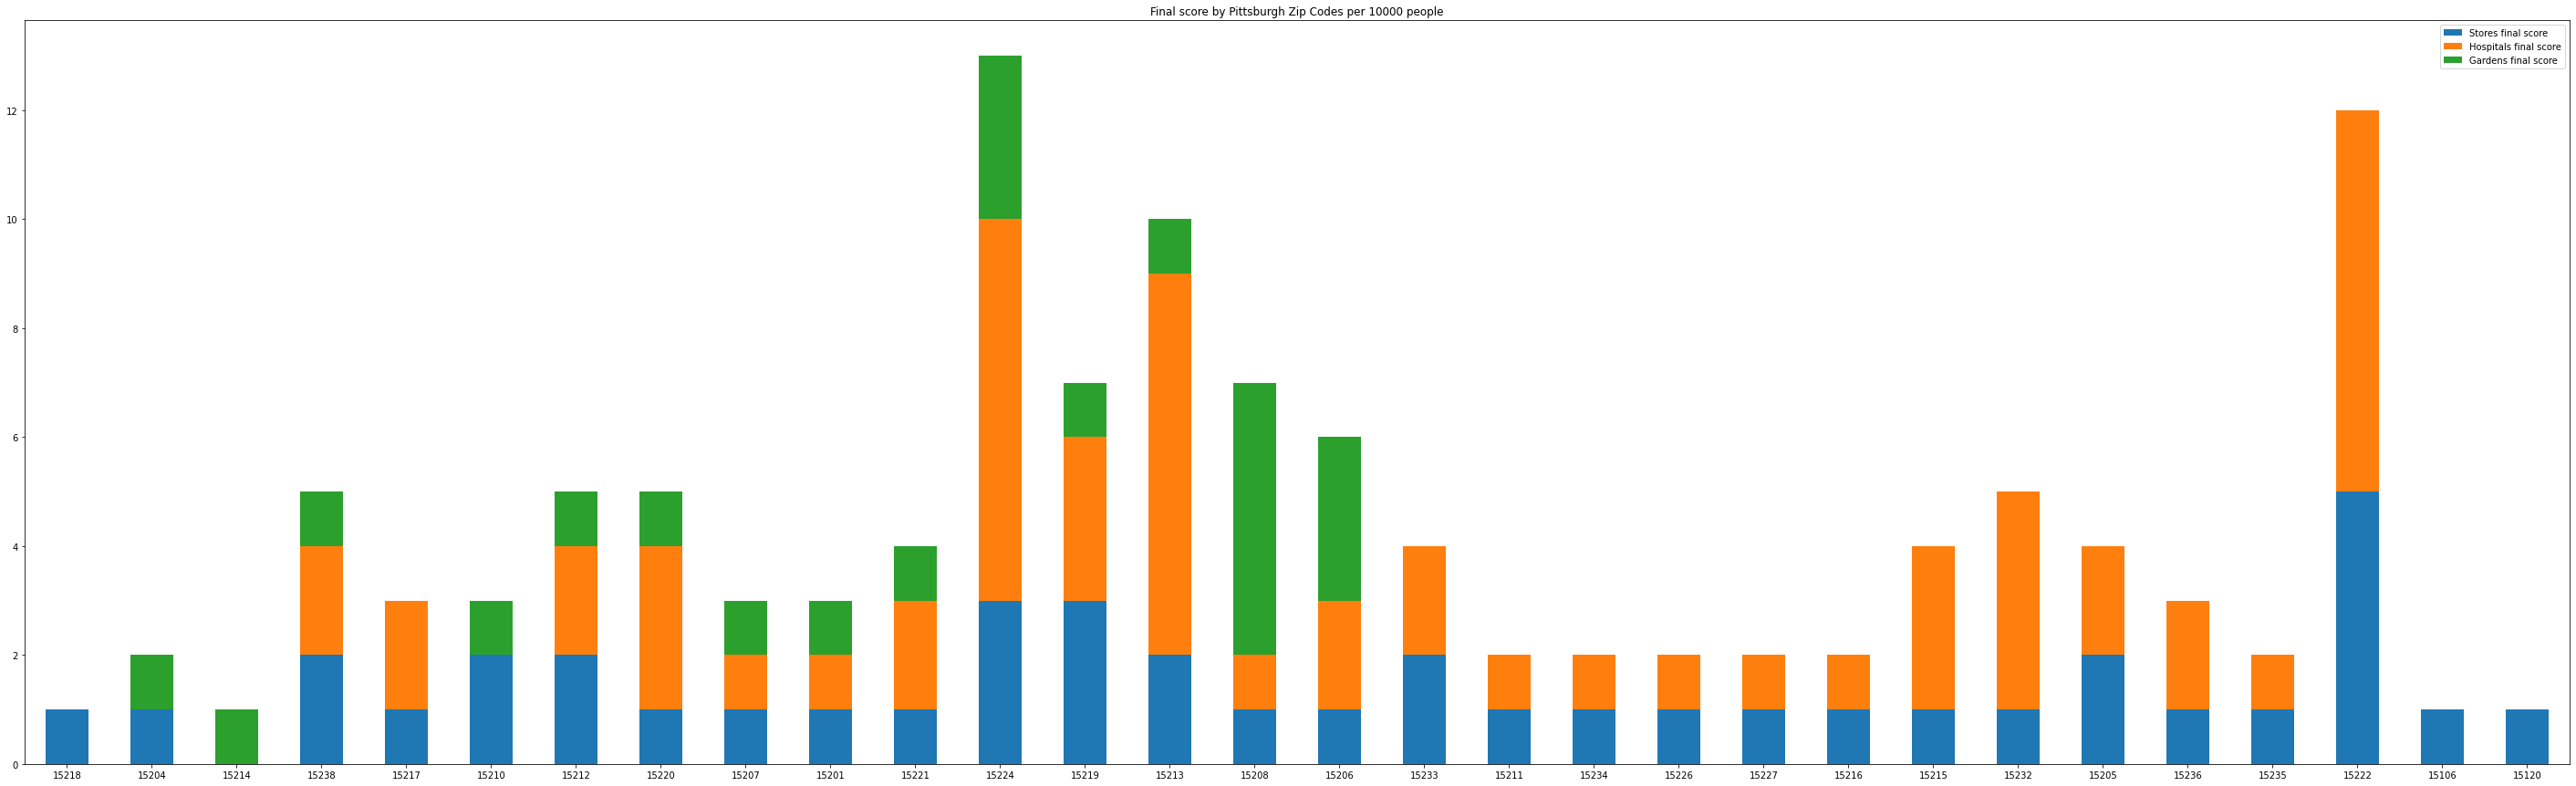

In [8]:
dfTH=df.drop(columns=['Number of Stores',"Stores per 10000",'Number of Hospitals','Hospitals per 10000','Garden Score',"Garden Score 10000"])
dfTH.plot.bar(figsize=(50,15),rot=0, title='Final score by Pittsburgh Zip Codes per 10000 people',stacked=True)

## Final Conclusion

After applying an appropriate weight to each metric 15224(Bloomfield) is the highest scoring and most well rounded. As previously noted 15222(strip district) comes in close second scoring very highly in the first two metrics. On average the zipcodes that had some form of local garden were already outperforming the average zipcode and further inspection might unearth some underlying correlation that would lead to this.